# Algorithm Performance Data Analysis - Run 1

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 40 | 0 | 
| max | 200 | 0.10 | 
| step| 10 | 0.01 | 

In [3]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## first test data 
data = pd.read_csv('IndividualCompressionData_since_test_20231102_184431.csv')

In [4]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_184431,10404007.png,502730,568439,-65709,-0.130704,21,16,0,0,0,0.0,9.299525,573.685616,20.544064,40,0.0
1,2,test_20231102_184431,1254659.png,342646,344984,-2338,-0.006823,16,7,0,0,0,0.0,6.091620,296.602091,23.409062,40,0.0
2,3,test_20231102_184431,10188041.png,221231,73954,147277,0.665716,4,5,0,0,0,0.0,5.055412,191.995963,25.297883,40,0.0
3,4,test_20231102_184431,10287332.png,216980,63064,153916,0.709356,5,4,0,0,0,0.0,5.309479,186.131520,25.432604,40,0.0
4,5,test_20231102_184431,11610969.png,368720,274579,94141,0.255318,8,6,0,0,0,0.0,7.258656,365.238741,22.505035,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,6,test_20231102_184601,10350842.png,212614,16,212598,0.999925,0,4,0,0,0,0.0,55.226706,11938.014080,7.361483,200,0.1
1866,7,test_20231102_184601,10863862.png,317432,16,317416,0.999950,0,4,0,0,0,0.0,55.749476,12668.007861,7.103720,200,0.1
1867,8,test_20231102_184601,11382381.png,312486,16,312470,0.999949,1,3,0,0,0,0.0,30.521228,5261.919984,10.919361,200,0.1
1868,9,test_20231102_184601,11079715.png,443815,16,443799,0.999964,0,4,0,0,0,0.0,73.080213,22147.381120,4.677580,200,0.1


## Analyze per Image

In [5]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [6]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_184431,10404007.png,502730,568439,-65709,-0.130704,21,16,0,0,0,0.0,9.299525,573.685616,20.544064,40,0.00
10,1,test_20231102_184432,10404007.png,502730,567794,-65064,-0.129421,14,7,0,0,0,0.0,9.316521,575.406928,20.531053,40,0.01
20,1,test_20231102_184432,10404007.png,502730,561946,-59216,-0.117789,9,7,0,0,0,0.0,9.406891,586.261963,20.449886,40,0.02
30,1,test_20231102_184433,10404007.png,502730,560439,-57709,-0.114791,9,7,0,0,0,0.0,9.432715,589.842581,20.423442,40,0.03
40,1,test_20231102_184434,10404007.png,502730,553869,-51139,-0.101723,12,6,0,0,0,0.0,9.572492,607.709157,20.293846,40,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1,test_20231102_184559,10404007.png,502730,16,502714,0.999968,1,3,0,0,0,0.0,31.611186,5234.651008,10.941926,200,0.06
1830,1,test_20231102_184600,10404007.png,502730,16,502714,0.999968,1,3,0,0,0,0.0,31.611186,5234.651008,10.941926,200,0.07
1840,1,test_20231102_184600,10404007.png,502730,16,502714,0.999968,1,4,0,0,0,0.0,31.611186,5234.651008,10.941926,200,0.08
1850,1,test_20231102_184601,10404007.png,502730,16,502714,0.999968,1,3,0,0,0,0.0,31.611186,5234.651008,10.941926,200,0.09


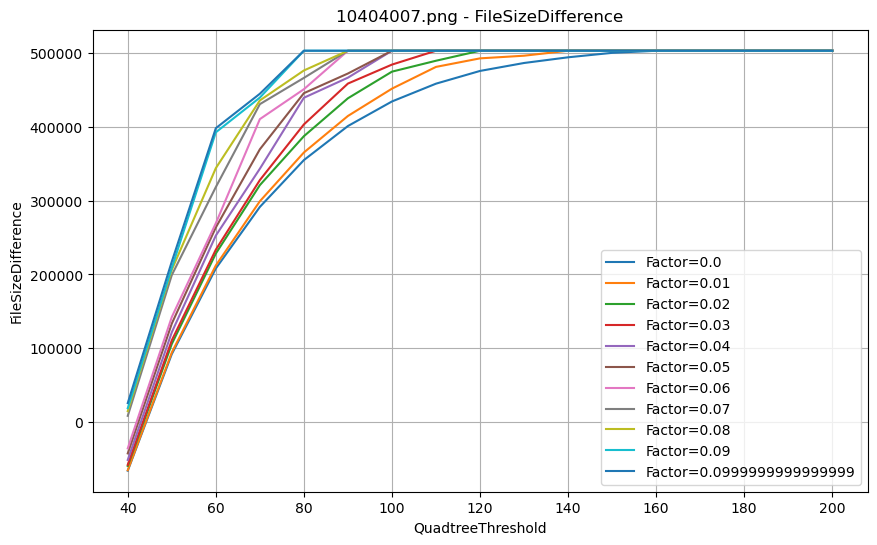

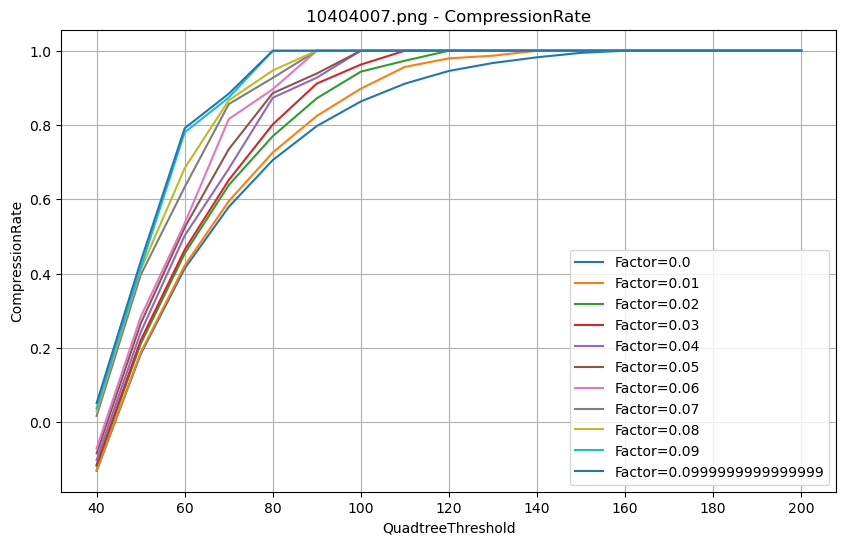

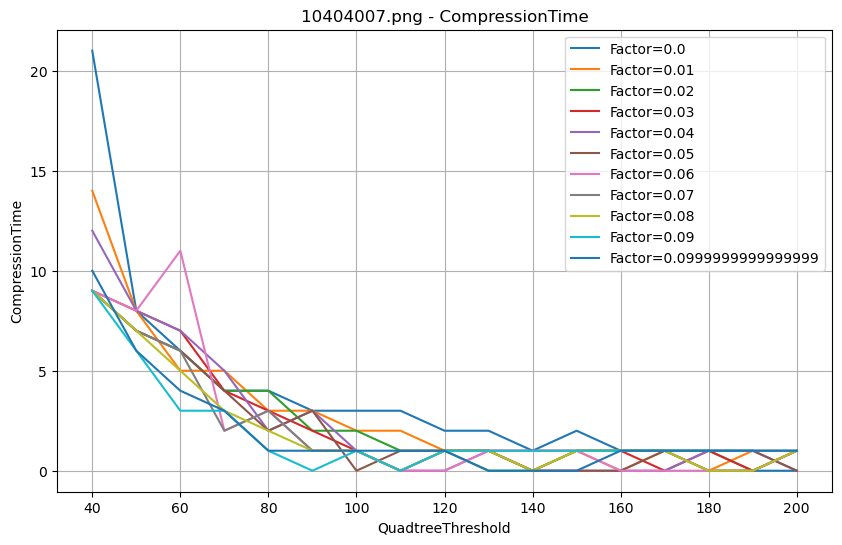

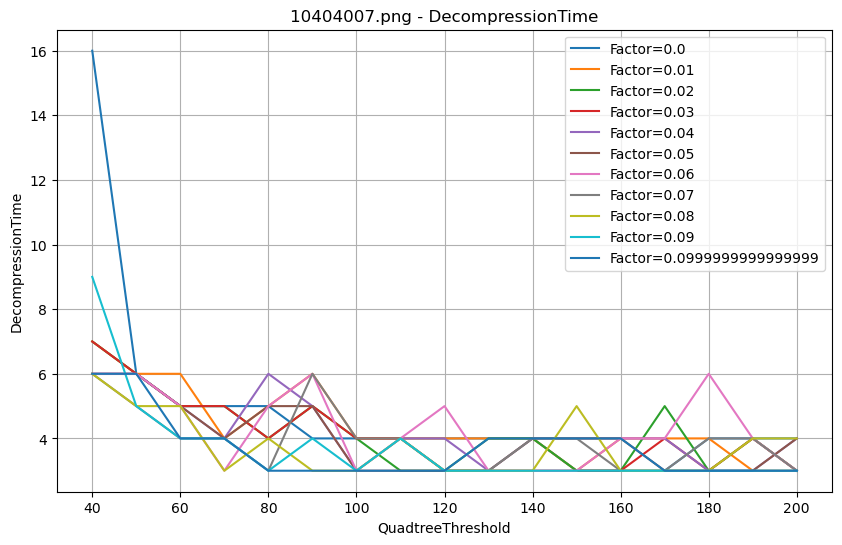

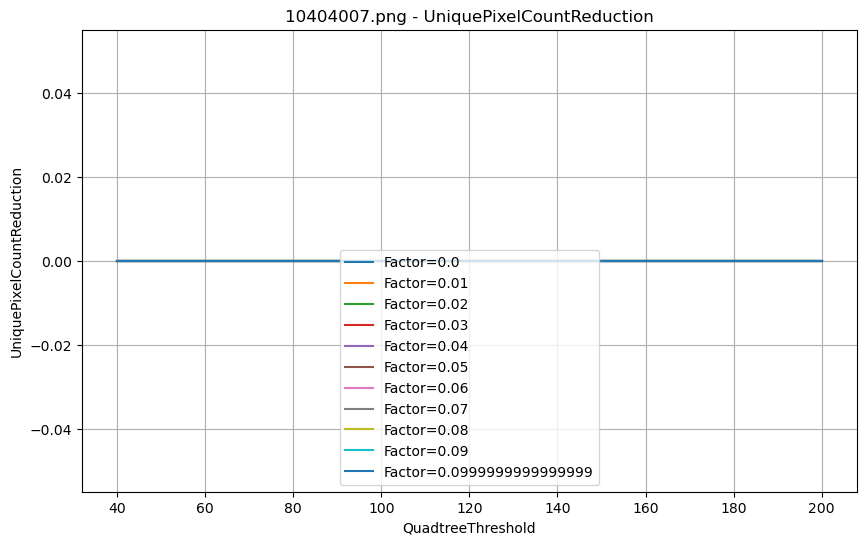

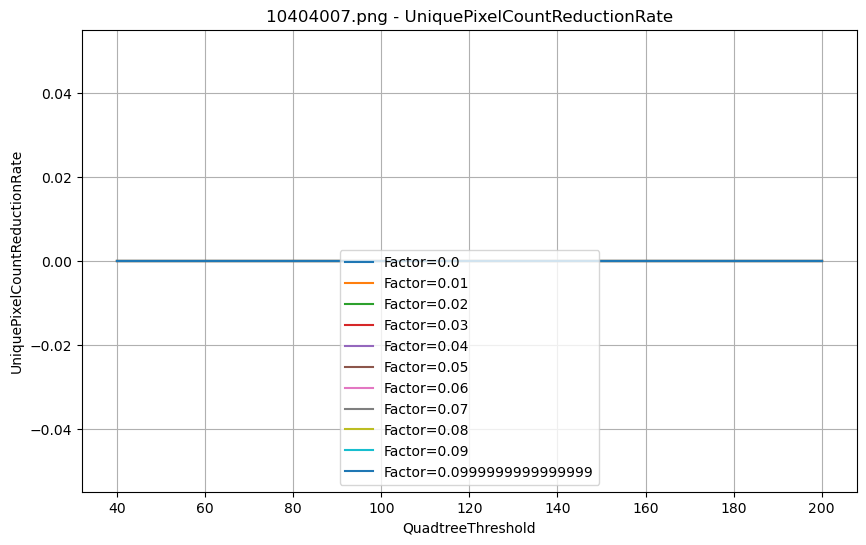

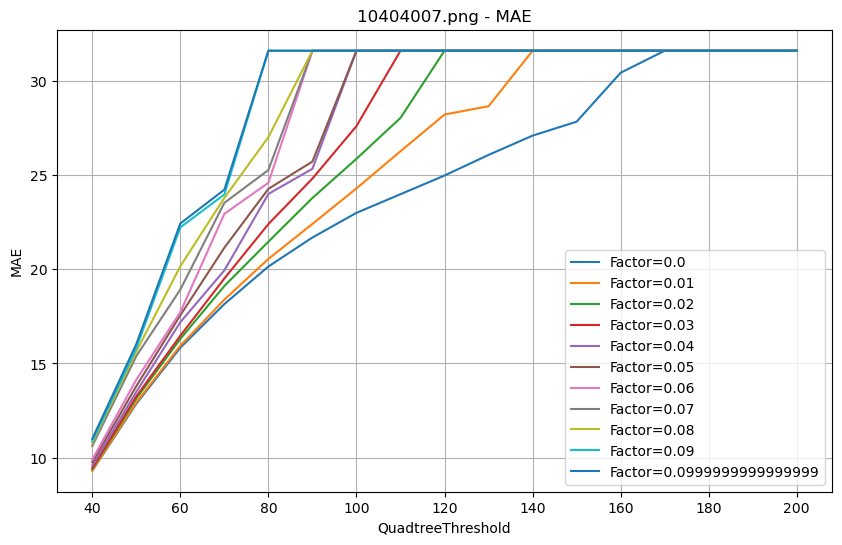

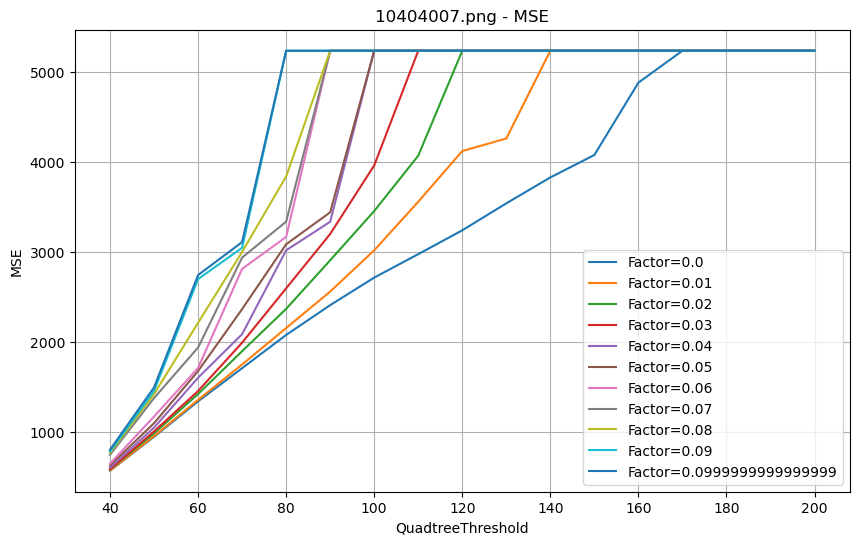

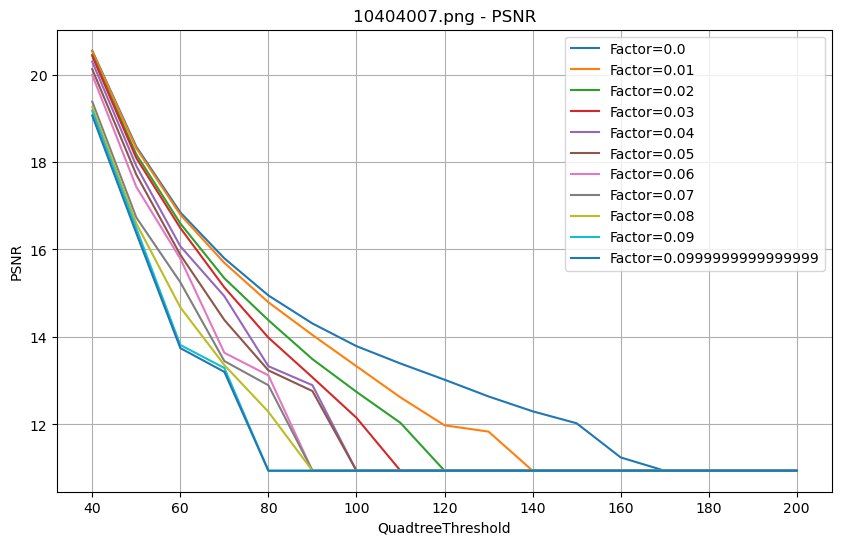

In [7]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [8]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_18945/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [9]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231102_184431,40,0.00,5.5,321053.7,225609.9,95443.8,0.388415,7.7,6.3,0.0,0.0,0.0,0.0,6.706597,310.069708,23.462078
1,test_20231102_184432,40,0.01,5.5,321053.7,223745.6,97308.1,0.394995,6.2,5.0,0.0,0.0,0.0,0.0,7.066876,338.499338,22.993215
2,test_20231102_184432,40,0.02,5.5,321053.7,218922.1,102131.6,0.410578,5.4,4.8,0.0,0.0,0.0,0.0,7.324904,366.467483,22.609556
3,test_20231102_184433,40,0.03,5.5,321053.7,217571.7,103482.0,0.415065,4.7,4.8,0.0,0.0,0.0,0.0,7.428177,379.804757,22.443763
4,test_20231102_184434,40,0.04,5.5,321053.7,212779.6,108274.1,0.430195,5.0,4.5,0.0,0.0,0.0,0.0,7.744363,426.696158,21.935428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,test_20231102_184559,200,0.06,5.5,321053.7,16.0,321037.7,0.999946,0.7,3.4,0.0,0.0,0.0,0.0,51.105148,12404.322642,8.068942
183,test_20231102_184600,200,0.07,5.5,321053.7,16.0,321037.7,0.999946,0.7,3.5,0.0,0.0,0.0,0.0,51.105148,12404.322642,8.068942
184,test_20231102_184600,200,0.08,5.5,321053.7,16.0,321037.7,0.999946,0.5,3.6,0.0,0.0,0.0,0.0,51.105148,12404.322642,8.068942
185,test_20231102_184601,200,0.09,5.5,321053.7,16.0,321037.7,0.999946,0.7,3.4,0.0,0.0,0.0,0.0,51.105148,12404.322642,8.068942


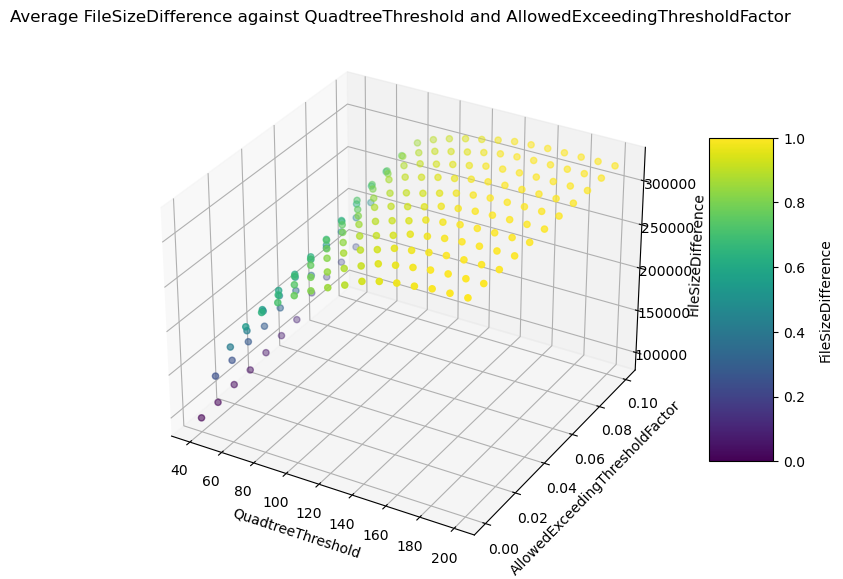

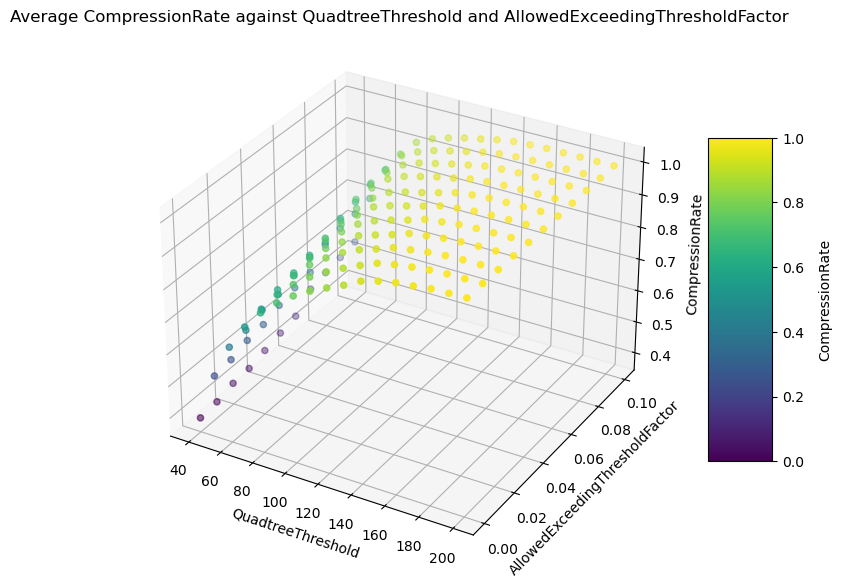

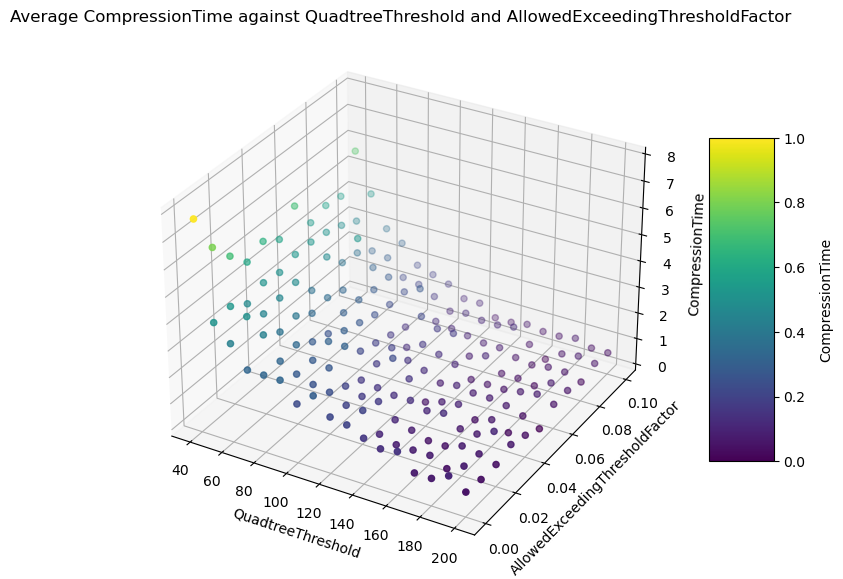

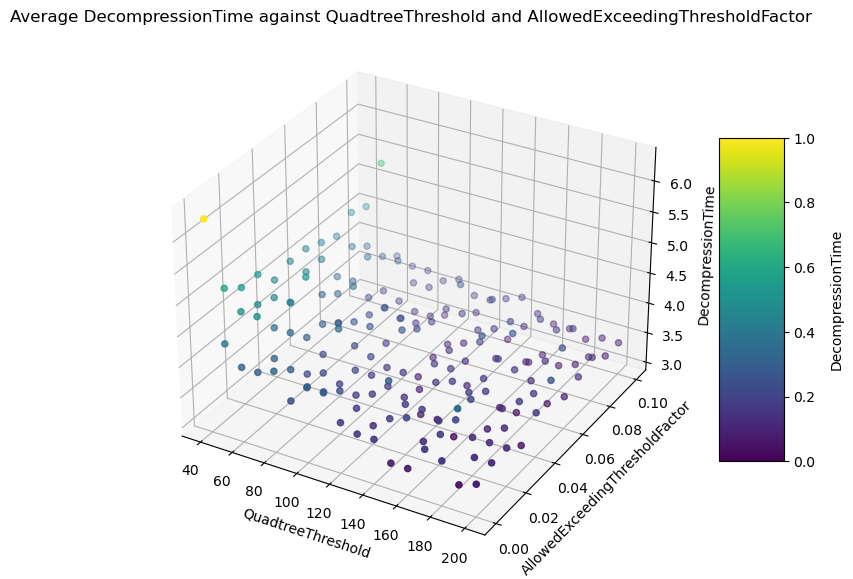

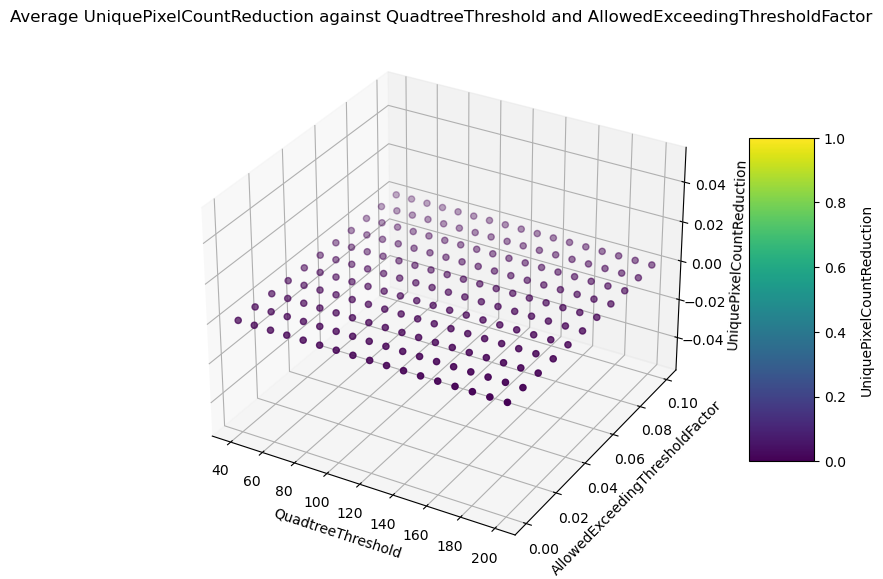

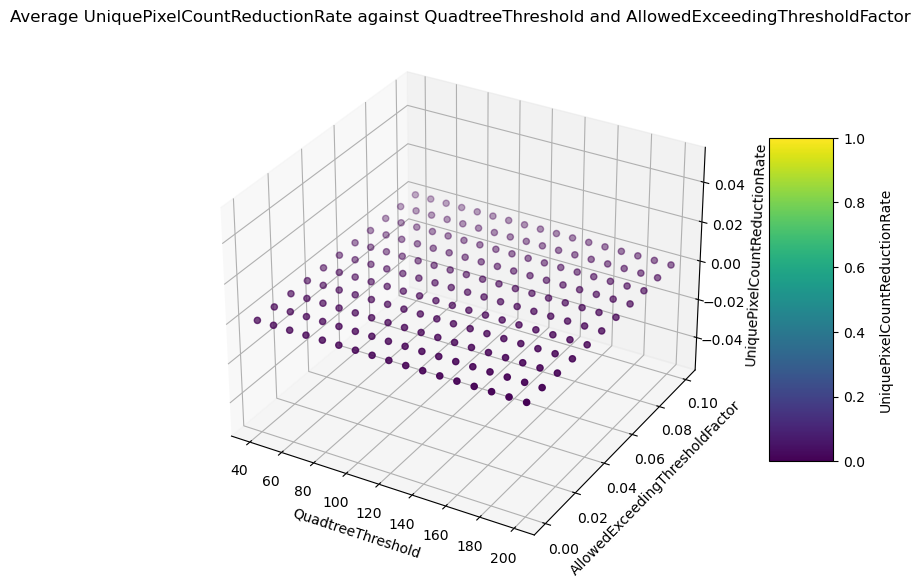

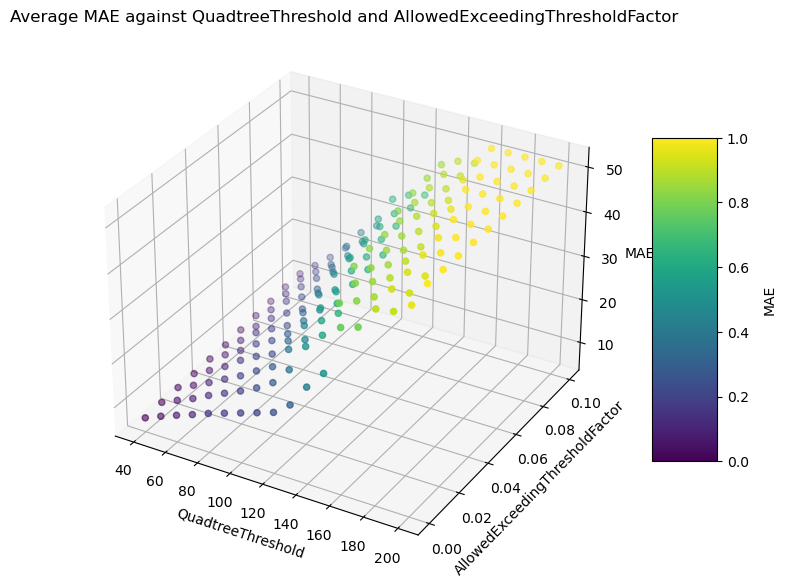

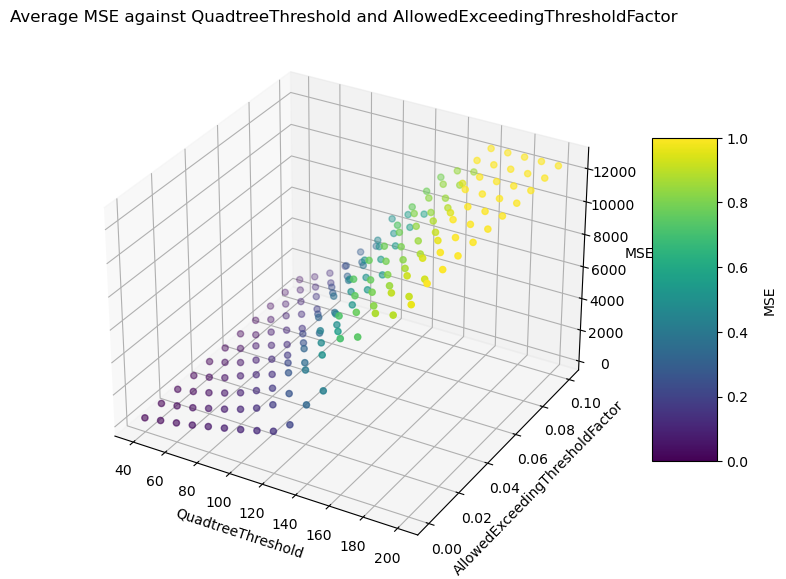

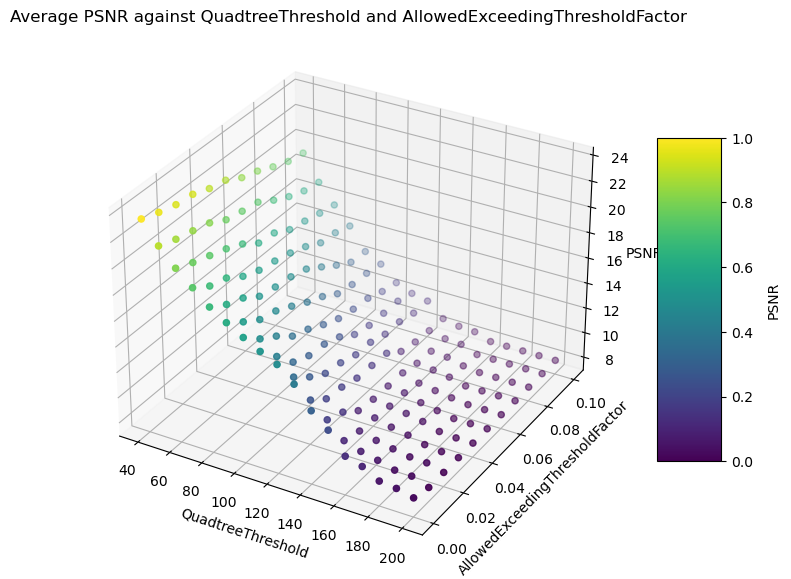

In [10]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


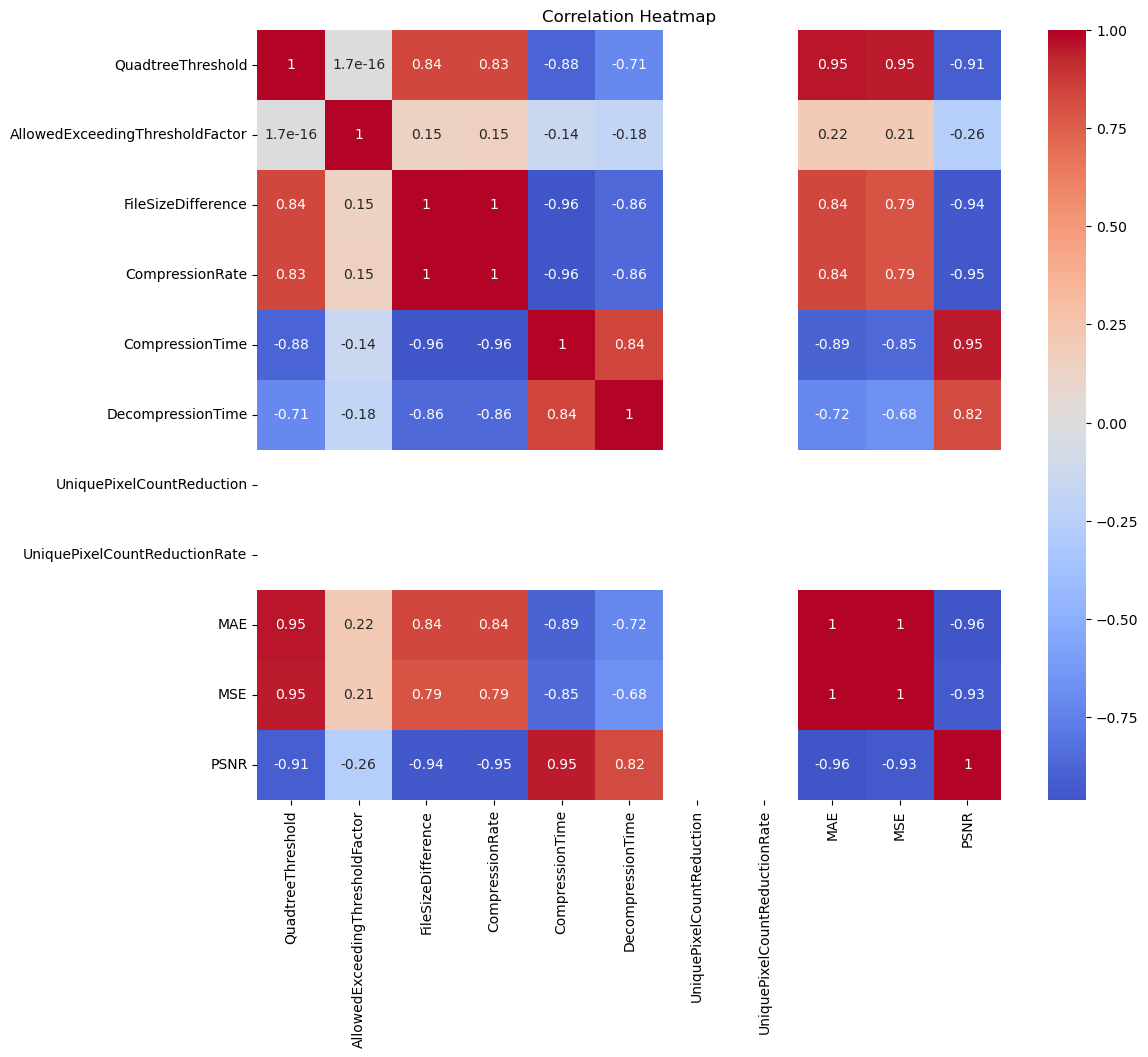

In [11]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [12]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

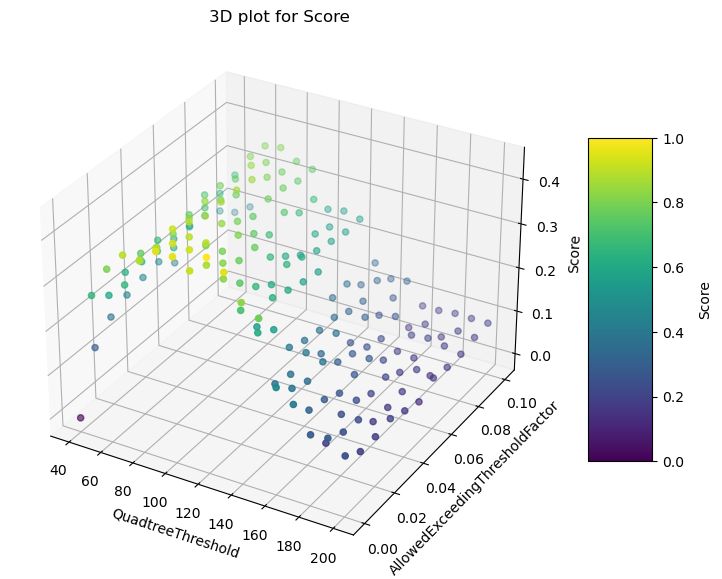

In [13]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

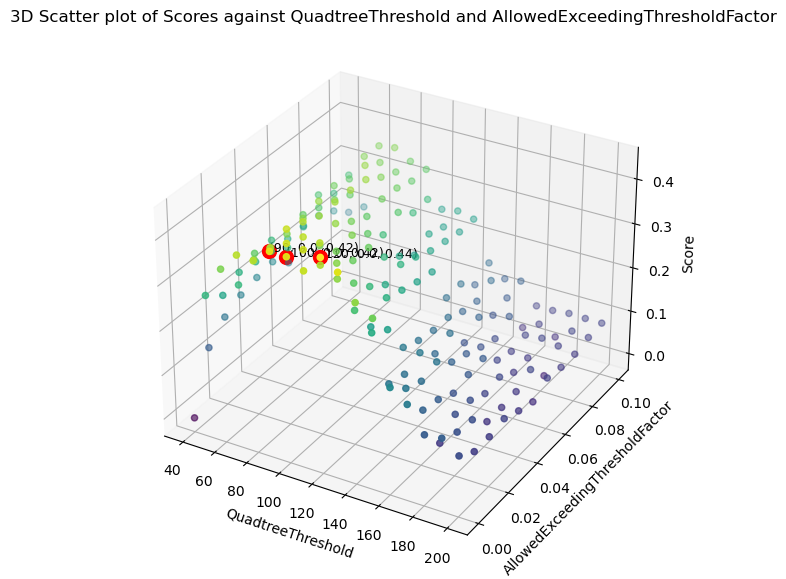

In [14]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [15]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


    QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
88                120                              0.0  0.437572
55                 90                              0.0  0.419254
66                100                              0.0  0.418186
